## Challenge causalLens
- **Name**: Roberto Silveira
- **Email**: rsilveira79@gmail.com

In [137]:
## General Imports
import numpy as np
import pandas as pd
from pandas.plotting import autocorrelation_plot
from sklearn.preprocessing import MinMaxScaler
from dateutil.parser import parse 
from statsmodels.tsa.seasonal import seasonal_decompose

## Plot libs
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

## PyTorch Imports
import torch
import torch.nn as nn

## Atributes (ref: https://archive.ics.uci.edu/ml/datasets/Air+quality)

0 Date (DD/MM/YYYY)  
1 Time (HH.MM.SS)  
2 True hourly averaged concentration CO in mg/m^3 (reference analyzer)  
3 PT08.S1 (tin oxide) hourly averaged sensor response (nominally CO targeted)  
4 True hourly averaged overall Non Metanic HydroCarbons concentration in microg/m^3 (reference analyzer)  
5 True hourly averaged Benzene concentration in microg/m^3 (reference analyzer)  
6 PT08.S2 (titania) hourly averaged sensor response (nominally NMHC targeted)  
7 True hourly averaged NOx concentration in ppb (reference analyzer)  
8 PT08.S3 (tungsten oxide) hourly averaged sensor response (nominally NOx targeted)  
9 True hourly averaged NO2 concentration in microg/m^3 (reference analyzer)  
10 PT08.S4 (tungsten oxide) hourly averaged sensor response (nominally NO2 targeted)  
11 PT08.S5 (indium oxide) hourly averaged sensor response (nominally O3 targeted)  
12 Temperature in Â°C  
13 Relative Humidity (%)  
14 AH Absolute Humidity  

In [138]:
!ls AirQualityUCI/

AirQualityUCI.csv  AirQualityUCI.xlsx


In [139]:
dataset = pd.read_csv("AirQualityUCI/AirQualityUCI.csv", 
                        sep=";",
                      parse_dates=['Date'],
                     index_col = 'Date')
dataset =dataset.fillna(value=0)
dataset = dataset.loc[dataset.index.notnull()]
dataset.head()

,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
Date,,,,,,,,,,,,,,,,
2004-10-03,18.00.00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578",0.0,0.0
2004-10-03,19.00.00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255",0.0,0.0
2004-10-03,20.00.00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502",0.0,0.0
2004-10-03,21.00.00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867",0.0,0.0
2004-10-03,22.00.00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888",0.0,0.0


In [140]:
dataset.columns

Index(['Time', 'CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)',
       'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)',
       'PT08.S5(O3)', 'T', 'RH', 'AH', 'Unnamed: 15', 'Unnamed: 16'],
      dtype='object')

In [141]:
## Question 1
print(len(dataset['2004-05']))
dataset['2004-05']['CO(GT)'].max()

672


'8,1'

In [76]:
## Question 2
dataset.sort_values(['NOx(GT)'], ascending=False)

,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
Date,,,,,,,,,,,,,,,,
2004-12-13,18.00.00,"9,9",1881.0,-200.0,"50,8",1983.0,1479.0,334.0,269.0,2271.0,2523.0,"12,6","55,9","0,8142",0.0,0.0
2004-11-26,18.00.00,"10,1",1956.0,-200.0,"45,2",1877.0,1389.0,347.0,255.0,2338.0,2465.0,"15,5","62,8","1,0979",0.0,0.0
2004-11-23,19.00.00,"11,9",2008.0,-200.0,"50,6",1980.0,1389.0,325.0,220.0,2562.0,2342.0,"12,4","74,7","1,0741",0.0,0.0
2004-11-23,18.00.00,"10,2",1982.0,-200.0,"49,5",1959.0,1369.0,322.0,227.0,2536.0,2386.0,"13,2","72,6","1,0936",0.0,0.0
2004-11-23,20.00.00,"11,5",1918.0,-200.0,"49,4",1958.0,1358.0,335.0,190.0,2477.0,2237.0,"11,5","76,2","1,0324",0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2004-10-16,05.00.00,-200,926.0,-200.0,"4,7",747.0,-200.0,902.0,-200.0,1325.0,759.0,"14,5","80,5","1,3221",0.0,0.0
2004-10-16,06.00.00,-200,971.0,-200.0,"6,9",851.0,-200.0,808.0,-200.0,1389.0,876.0,"14,6","79,0","1,3082",0.0,0.0
2004-10-16,07.00.00,-200,1029.0,-200.0,"7,7",886.0,-200.0,807.0,-200.0,1446.0,926.0,"15,0","74,8","1,2672",0.0,0.0


In [77]:
date_nox = '2004-12-13'
date_nox = datetime.strptime(date_nox, "%Y-%m-%d" )
print(date_nox.weekday())
## Monday

0


In [78]:
## Question 3
dataset['2005-01']['NO2(GT)'].sum()

65527.0

In [79]:
## Question 4
dataset['2004-01']['AH'] = dataset['2004-01']['AH']

/Users/rsilvei/Envs/bayesian/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [89]:
float(dataset['CO(GT)'][0].replace(",","."))

2.6

In [103]:
lambda x: float(x.replace(",","."))

<function __main__.<lambda>(x)>

In [104]:
dataset['CO(GT)'] = dataset['CO(GT)'].apply(lambda x: float(x.replace(",",".")))

In [105]:
type(dataset['CO(GT)'][0])

numpy.float64

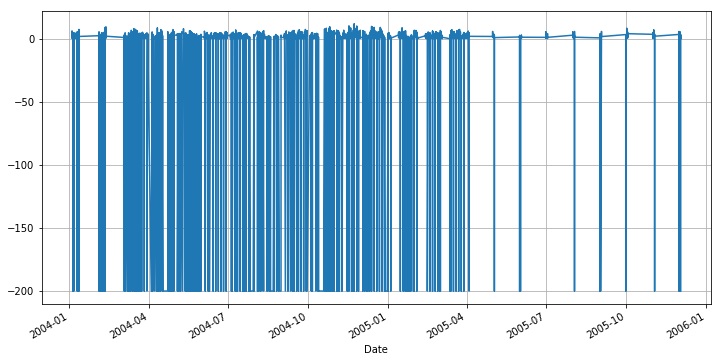

In [106]:
plt.figure(figsize=(12,6))
dataset['CO(GT)'].plot()
plt.grid()

In [109]:
dataset['CO(GT)'].max(), dataset['CO(GT)'].min()

(11.9, -200.0)

In [171]:
dataset['target'] = dataset['CO(GT)'].shift(1)

In [172]:
dataset.corr(method="pearson")['target']

CO(GT)           0.865878
PT08.S1(CO)      0.037374
NMHC(GT)         0.123690
C6H6(GT)        -0.031283
PT08.S2(NMHC)    0.024740
NOx(GT)          0.508300
PT08.S3(NOx)    -0.084541
NO2(GT)          0.651210
PT08.S4(NO2)    -0.076524
PT08.S5(O3)      0.075966
Unnamed: 15           NaN
Unnamed: 16           NaN
target           1.000000
Name: target, dtype: float64

In [119]:
## Linear Regression

In [201]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [147]:
model = LinearRegression()

In [148]:
dataset.columns

Index(['Time', 'CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)',
       'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)',
       'PT08.S5(O3)', 'T', 'RH', 'AH', 'Unnamed: 15', 'Unnamed: 16'],
      dtype='object')

In [154]:
dataset['CO(GT)'] = dataset['CO(GT)'].apply(lambda x: float(x.replace(",",".")))

In [142]:
type(dataset['PT08.S1(CO)'][0])

numpy.float64

In [143]:
type(dataset['NMHC(GT)'][0])

numpy.float64

In [144]:
dataset['C6H6(GT)'] = dataset['C6H6(GT)'].apply(lambda x: float(x.replace(",",".")))
type(dataset['C6H6(GT)'][0])

numpy.float64

In [145]:
type(dataset['PT08.S2(NMHC)'][0])

numpy.float64

In [189]:
dataset['T'] = dataset['T'].apply(lambda x: float(x.replace(",",".")))

In [190]:
dataset['RH'] = dataset['RH'].apply(lambda x: float(x.replace(",",".")))

In [191]:
dataset['AH'] = dataset['AH'].apply(lambda x: float(x.replace(",",".")))

In [192]:
x = dataset[['CO(GT)','PT08.S1(CO)',
             'NMHC(GT)', 'C6H6(GT)', 
             'PT08.S2(NMHC)', 'NOx(GT)',
             'PT08.S3(NOx)', 'NO2(GT)', 
             'PT08.S4(NO2)',
             'PT08.S5(O3)', 'T', 'RH', 'AH'
            ]]
y = dataset['target']

In [193]:
x

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
Date,,,,,,,,,,,,,
2004-10-03,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
2004-10-03,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2004-10-03,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
2004-10-03,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
2004-10-03,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2005-04-04,3.1,1314.0,-200.0,13.5,1101.0,472.0,539.0,190.0,1374.0,1729.0,21.9,29.3,0.7568
2005-04-04,2.4,1163.0,-200.0,11.4,1027.0,353.0,604.0,179.0,1264.0,1269.0,24.3,23.7,0.7119
2005-04-04,2.4,1142.0,-200.0,12.4,1063.0,293.0,603.0,175.0,1241.0,1092.0,26.9,18.3,0.6406


In [176]:
y.fillna(value=0 , inplace = True)

In [207]:
x_train, x_valid, y_train, y_valid = train_test_split(x, y, 
                                                      test_size = 0.4,
                                                      shuffle = True)

In [208]:
x_train.shape, x_valid.shape, y_train.shape, y_valid.shape

((5614, 13), (3743, 13), (5614,), (3743,))

In [209]:
model.fit(x_train, y_train)

LinearRegression()

In [210]:
preds = model.predict(x_valid)

In [211]:
mean_absolute_error(y_valid, preds)

15.007247537273768

In [212]:
mean_squared_error(y_valid, preds)

1419.8779611801388

In [213]:
r2_score(y_valid, preds)

0.7603705299643854